<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>
    
Привет! Меня зовут Алексей Тюрин, я буду делать ревью этой работы. Давай будем общаться на «ты».

У тебя хорошая, внимательная работа 👍. Есть неточность при подсчёте выручки и что-то непонятное при тесте на равенство средних :) Как со всем разберешься -- буду рад принять работу.


Зелёным цветом отмечены комментарии, не требующие правки. Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому или можно поправить прямо сейчас.

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». Если оставляешь комментарии на какой-то итерации ревью, пиши что-то вроде `комментарий студента V.номер итерации`
</div>

Цвет можно сделать, например, так

<div class = "alert alert-info" >
<h2>Комментарий студента</h2>
Ревьюер душнила :)
</div>

Или так:
    
<div class="alert alert-info" style="background:pink;color:#A91E69">
<h2>Комментарий студента </h2>
    ...
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>
Алексей, привет! Приятно снова работать с тобой над проектом :) Спасибо за развернутые пояснения, постаралась все поправить, правда, с тестами на равенство средних что-то пошло не так, нужен еще совет.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

Откомментил там, что осталось поправить и в чём была проблема в тестах, осталось поправить совсем немного :)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.3</h2>

Теперь всё верно :) Удачи в следующих спринтах
</div>

# Определение перспективного тарифа для телеком-компании

**Описание проекта**

Компания «Мегалайн», федеральный оператор сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Проведем предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей


## Изучение и предобработка данных

### Изучим общую информацию

In [31]:
import pandas as pd
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.info()
df_calls.head()
#df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице с данными по звонкам 202 607 записей и 3 типа данных: float64, int64, object. 4 столбца. Максималная длительность звонка: 38 минут, минимальная - 0 (не дозвонились или сбросили, например), среднее значение длительности - 6,8 минут. Пропусков нет. У столбца 'id' нечисловое значение, это будет встречаться еще в нескольких таблицах. На первый взгляд, для расчетов эти индексы не пригодятся, нам главное иметь под рукой 'user_id'.

In [32]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.info()
df_internet.head()
#df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице с данными про использование мобильного интернета 149 396 записей, 3 типа данных: float64, int64, object. 5 столбцов, среди них сомнительный "Unnamed: 0". В среднем пользователи тратят 74 697.5 Мб, максимальное значение - 149 395 Мб, минимальное - 0 (пользователь мог уехать в тайгу или Гималаи, отключить мобильный интернет или купить кнопочный телефон). Пропусков нет.

<div class="alert alert-success">
    <h2>Комментарий ревьюера</h2>
    
`Unnamed: 0` возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.
    
</div>    

<div class="alert alert-info">
<h2>Комментарий ревьюера</h2>
Принято, спасибо!    
</div>  

In [33]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.info()
df_messages.head()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В таблице "messages" 123 036 записи, 2 типа данных: int64, object. 3 столбца. Количество сообщений неизвестно, только дата отправки. Примем, что дата отправки и id подскажут о количестве. Пропусков нет.

In [34]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.info()
df_tariffs.head()
#df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице с тарифами больше всего столбцов - 8, меньше всего строк - 2. Это общее описание двух тарифов.

In [35]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.info()
df_users.head()
#df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице с пользователями 500 строк, 2 типа данных: int64, object. В столбце с датой прекращения пользования тарифом 462 NaN, т.е. у большинства тариф ещё действовал на момент выгрузки данных. Здесь есть данные по возрасту, городу, ФИО, дате начала использования тарифа и сам тариф.

## Посмотрим на данные

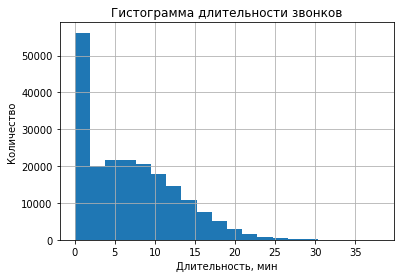

In [36]:
#построим гистограммы, посмотрим на данные
import matplotlib.pyplot as plt
df_calls['duration'].hist(bins=20, range = (0, 38))
plt.title('Гистограмма длительности звонков')
plt.ylabel("Количество")
plt.xlabel("Длительность, мин") 
plt.show()

Пик значений - 0 минут, т.е. 0 секунд, учитывая способ округления оператора. Здесь может быть ряд гипотез: нежелательные или обычные звонки, которые сбрасывались, сбои связи, сбой в выгрузке. Стоит уточнить у коллег, которые делали выгрузку.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Ну тут всё таки пик не ноль, а окрестность нуля, которая и 1 минуту влючает тоже, т.к. у тебя 20 `bins` на `range` в 38

Ниже видно что пик там-же, но уже включает меньше точек, вообще чтобы нулевые звонки посмотреть надо их взять отдельно, потому что с `bins` сложно такую гранулярность получить (но их всё равно больше всех)
</div>

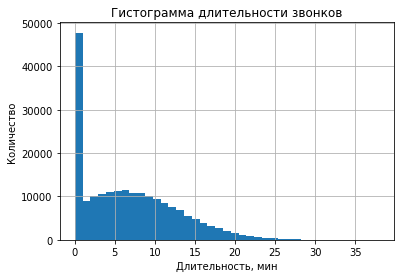

In [37]:
#Код ревьюера
df_calls['duration'].hist(bins=39, range = (0, 38))
plt.title('Гистограмма длительности звонков')
plt.ylabel("Количество")
plt.xlabel("Длительность, мин") 
plt.show()

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>
Спасибо!
</div>

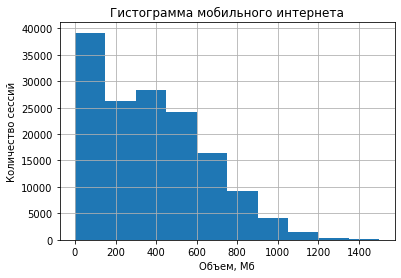

In [38]:
df_internet['mb_used'].hist(bins=10, range = (0, 1500))
plt.title('Гистограмма мобильного интернета')
plt.ylabel("Количество сессий")
plt.xlabel("Объем, Мб")
plt.show()

Снова виден пик значений на 0, т.е. большое количество пользователей по данным из выгрузки не пользуются мобильным интернетом. Это может быть связано с любовью к Wi-Fi, географией и состоянием сети, моделями телефонов или сбоем в выгрузке. Более 1400 Мб тратят крайне редно, так что максимальное значение в 149 395 Мб - явный выброс.

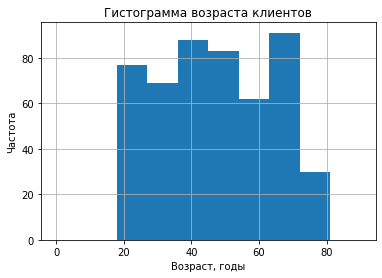

18
75


In [39]:
df_users['age'].hist(bins=10, range = (0, 90))
plt.title('Гистограмма возраста клиентов')
plt.ylabel("Частота")
plt.xlabel("Возраст, годы")
plt.show()
print(df_users['age'].min())
print(df_users['age'].max())

Услугами опертора пользуются и стар, и млад: от 18 до 75 лет.

In [40]:
#посмотрим на географию, проверим, все ли в порядке
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [41]:
top_10_cities = df_users.groupby('city')['city'].count()
print(top_10_cities.sort_values(ascending = False).head(10))

city
Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Екатеринбург        11
Ульяновск           11
Набережные Челны    11
Краснодар           11
Name: city, dtype: int64


Больше всего данных по пользователям в Москве, Санкт-Петербурге и Новосибирске.  

## Проанализируем количество звонков, сообщений и трафика по месяцам

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [42]:
#для аналатики по месяцам выделим их из столбца с датами

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month
#print(df_calls.head()) #проверили, готово

#округлим минуты

from math import ceil
df_calls['duration_round'] = df_calls['duration'].apply(ceil)

#проверим
#df_calls.head()

#теперь построим сводную таблицу для звонков по месяцам
#calls_min = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration_round', aggfunc = ['count', 'sum']).reset_index()
#calls_min.head()

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Таблички лучше выводить, используя `display` вместо `print`. Чтобы использовать `month` нужно быть уверенной, что все сессии лежат в пределах одного года, т.к. `month` вернёт один месяц для, например, января 2018 и января 2019 года, или можно использовать `astype('datetime64[M]')` -- он вернёт месяц вместе с годом
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>

Поняла, спасибо!
</div>

In [43]:
#отсечем звонки длительностью 0 секунд/минут

calls_min = df_calls.query('duration_round > 0').pivot_table(index = ['user_id', 'month'], values = 'duration_round', aggfunc = ['count', 'sum']).reset_index()
calls_min.head()

,user_id,month,count,sum
,,,duration_round,duration_round
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


,user_id,month,count,sum
,,,duration_round,duration_round
count,3168.000000,3168.000000,3168.000000,3168.000000
mean,1251.477588,8.317551,51.450126,457.797033
std,144.574946,2.907181,26.439188,237.423514
min,1000.000000,1.000000,1.000000,1.000000
25%,1126.000000,6.000000,33.000000,290.750000
50%,1254.000000,9.000000,50.000000,447.500000
75%,1379.000000,11.000000,67.000000,592.250000
max,1499.000000,12.000000,190.000000,1673.000000


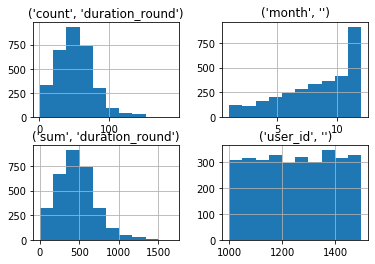

In [44]:
calls_min.hist();
calls_min.describe()

В среднем пользователи совершали 63 звонка в месяц и тратили 421-431 минуту. Есть пользователи, которые не звонили (потратили 0 минут), есть максимальное значение: 244 звонка и 1 578 минут в месяц. В количестве звонков и сумме минут есть выбросы.

### Количество сообщений и израсходованных ГБ по месяцам

In [45]:
#снова выделим месяцы

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month

In [46]:
# посчтиаем сообщения

messages_months = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count']).reset_index()
display(messages_months)

,user_id,month,count
,,,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48


,user_id,month,count
,,,id
count,2717.000000,2717.000000,2717.000000
mean,1255.635259,8.345234,45.283769
std,146.227484,2.892920,35.051363
min,1000.000000,1.000000,1.000000
25%,1126.000000,6.000000,19.000000
50%,1266.000000,9.000000,38.000000
75%,1384.000000,11.000000,63.000000
max,1499.000000,12.000000,224.000000


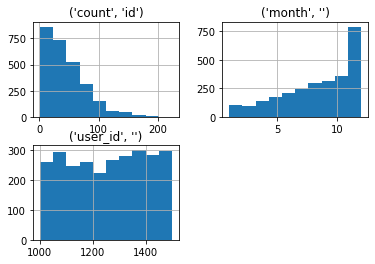

In [47]:
messages_months.hist();
messages_months.describe()

Так как в таблице messages нет количества сообщений, но есть id операций, предположим, что один id равен одному сообщению. В среднем - от 38 до 45 сообщений, минимум - 1 сообщение, максимум - 224 сообщения (кто-то очень не любит мессенджеры).

In [48]:
#посчитаем по месяцам
# internet_months = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])\
# .reset_index().rename({'sum':'mb_sum'}, axis=1)
internet_months = df_internet.groupby(["user_id","month"])['mb_used']\
.agg(['sum']).reset_index().rename({'sum':'mb_sum'}, axis=1)

#internet_months.describe()
#internet_months.info()

#переведем Мб в Гб

internet_months['gb_used'] = internet_months['mb_sum'] / 1024
internet_months.info()

#округлим
internet_months['gb_used'] = internet_months['gb_used'].apply(ceil)

#проверим
internet_months.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_sum     3203 non-null float64
gb_used    3203 non-null float64
dtypes: float64(2), int64(2)
memory usage: 100.2 KB


,user_id,month,mb_sum,gb_used
count,3203.000000,3203.000000,3203.000000,3203.000000
mean,1251.393069,8.320949,17266.708626,17.358414
std,144.824407,2.903834,7516.356902,7.343379
min,1000.000000,1.000000,0.000000,0.000000
25%,1124.000000,6.000000,12526.905000,13.000000
50%,1251.000000,9.000000,16963.110000,17.000000
75%,1379.000000,11.000000,21432.175000,21.000000
max,1499.000000,12.000000,49745.690000,49.000000


<div class="alert alert-danger">
<h2>Комментарий ревьюера V.2</h2>

Переводить в ГБ и округлять надо всё таки после того, как делаешь сводную таблицу, потому что так у тебя каждая сессия округлиться до 1ГБ
`pivot_table` без указания `aggfunc` кстати считает среднее (что и происходит выше)
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 2</h2>

Принято, сделала. Только у меня не получилось вернуть значения в df_internet, все время возникала ошибка, оставила в internet_months. И значения снова какие-то большие получились...
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.3</h2>

Да, всё верно :) Об этом говорят получившиеся в итоге `p-value`. Вполне нормальные числа получились, средняя сессия интернета 17 ГБ
</div>

In [49]:
#Код ревьюера, 0 только там, где была сессия в 0 МБ
internet_months['gb_used'].value_counts()

17    223
16    214
19    199
18    181
15    179
14    179
20    176
21    158
22    155
12    147
13    140
11    112
23    105
9      97
25     85
10     81
24     71
8      61
27     58
28     55
7      52
26     48
5      45
3      43
6      42
29     37
4      34
1      26
32     24
2      24
30     22
31     19
33     18
34     14
35     13
37     11
38     10
36      9
42      9
39      9
43      6
40      4
41      2
0       2
49      1
44      1
45      1
48      1
Name: gb_used, dtype: int64

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

По правилам такие манипуляции с трафиком надо делать после сводной таблицы: "Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта."
    
</div>

В среднем пользователи тратят 17 Гб в месяц, минимальное значение - 0 Мб, максимальное - 49 Гб.

<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

Ну 47-48 это довольно много, должно было натолкнуть на то, что что-то не так :) Выше `count` явно зря :)
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>

Поправила, не зацепилась за цифру, спасибо!
</div>

### Сгруппируем и объединим данные

In [50]:
#сгруппируем данные о звонках по пользователям и месяцам, посчитаем количество и длительность
df_calls.groupby(['user_id','month'])['duration_round'].agg(['count','sum'])
df_calls_months = df_calls.groupby(["user_id","month"])['duration_round']\
.agg(['count', 'sum']).reset_index().rename({'count':'call_count', 'sum':'call_sum'}, axis=1)
df_calls_months.head()

,user_id,month,call_count,call_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [51]:
# #сгруппируем данные о трафике по пользователям и месяцам, посчитаем расход трафика
# df_internet_months = df_internet.groupby(["user_id","month"])['gb_used']\
# .agg(['count', 'sum']).reset_index().rename({'count':'gb_count', 'sum':'gb_sum'}, axis=1)

# df_internet_months.head()

In [52]:
#сгруппируем данные о сообщениях по пользователям и месяцам, посчитаем количество
df_messages_months = df_messages.groupby(["user_id","month"])['id']\
.agg(['count']).reset_index().rename({'count':'messages_count'}, axis=1)
df_messages_months.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Тут уже всё верно, а чем не устроили таблицы выше?
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>

Эммм, мне показалось, что нужно получить единую красивую таблицу, чтобы корректно считать и выводить результаты. И в ветках с обсуждением проекта была такая рекомендация. Или таблицы с группировками лишние?)
    
Для дальнейших расчетов взяла gb_used, верно ли это? Подскажи, пожалуйста, надо ли еще раз округлить эти значения?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

> Эммм, мне показалось, что нужно получить единую красивую таблицу, чтобы корректно считать и выводить результаты. И в ветках с обсуждением проекта была такая рекомендация. Или таблицы с группировками лишние?)
    
`df_internet.pivot_table(index = ['user_id', 'month'], values = 'gb_used').reset_index()` и `df_internet.groupby(["user_id","month"])['gb_used']\
.agg(['count', 'sum']).reset_index().rename({'count':'gb_count', 'sum':'gb_sum'}, axis=1)` по факту почти одно и то же, только п ервой ты зачем-то средние считаешь, вместо суммы :)
    
    
> Для дальнейших расчетов взяла gb_used, верно ли это? Подскажи, пожалуйста, надо ли еще раз округлить эти значения?
    
Нужно поправить новый комментарий выше про округление сессий и брать конечно же `gb_sum`, а не `gb_used` :)   
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 2</h2>

> Нужно поправить новый комментарий выше про округление сессий и брать конечно же `gb_sum`, а не `gb_used` :)
    
Название оставила gb_used, чтобы далее везде не править и не пропустить, но по сути это сумма Мб + округление, так верно? Или я запуталась?)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V.3</h2>
    
Да, всё ок
</div>

In [53]:
#объединим таблицы со звонками, трафиком и сообщениями
df_1 = df_calls_months.merge(internet_months, on=['user_id','month'],\
how='outer').merge(df_messages_months, on=['user_id', 'month'], how='outer')
df_1

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count
0,1000,5,22.0,159.0,2253.49,3.0,22.0
1,1000,6,43.0,172.0,23233.77,23.0,60.0
2,1000,7,47.0,340.0,14003.64,14.0,75.0
3,1000,8,52.0,408.0,14055.93,14.0,81.0
4,1000,9,58.0,466.0,14568.91,15.0,57.0
...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11050.56,11.0,17.0
3210,1489,9,NaN,NaN,17206.30,17.0,32.0
3211,1489,10,NaN,NaN,19559.44,20.0,21.0
3212,1489,11,NaN,NaN,17491.56,18.0,20.0


In [54]:
#объединим таблицу с данными о пользователях
df_2 = df_1.merge(df_users, on=['user_id'], how='outer')
df_2

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,19559.44,20.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,17491.56,18.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,17322.51,17.0,35.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [55]:
#переименуем столбец с тарифом, чтобы объединить таблицы по нему
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
#df_tariffs.head()

In [56]:
#создадим единую таблицу
df = df_2.merge(df_tariffs, on=['tariff'], how='outer')
df

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,17206.30,17.0,32.0,35,NaN,Санкт-Петербург,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,19559.44,20.0,21.0,35,NaN,Санкт-Петербург,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,17491.56,18.0,20.0,35,NaN,Санкт-Петербург,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,17322.51,17.0,35.0,35,NaN,Санкт-Петербург,...,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


### Посчитаем выручку

In [57]:
#заполним пропуски, чтобы функция корректно отрабатывала подсчеты

#df.info() #найдем их
#call_count
#call_sum
#gb_used
#messages_count
#churn_date

#заполним нулями, так как это не исказит данные
df['call_count'] = df['call_count'].fillna(0)
df['call_sum'] = df['call_sum'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['messages_count'] = df['messages_count'].fillna(0)
#df.info() #проверили

In [58]:
#введем функцию для расчета и добавим результат в новый столбец
def tariff_revenue(row):
    minutes = row['call_sum']
    messages = row['messages_count']
    gb = row['gb_used']
    min_limit = row['minutes_included']
    message_limit = row['messages_included']
    gb_limit = row['mb_per_month_included'] / 1024
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']  
    rub_monthly_fee = row['rub_monthly_fee']
    
#     if minutes <= min_limit and messages <= message_limit and gb <= gb_limit:
#         return rub_monthly_fee
#     if minutes <= min_limit and messages <= message_limit and gb > gb_limit:
#         return (gb - gb_limit) * rub_per_gb + rub_monthly_fee
#     if minutes <= min_limit and messages > message_limit and gb > gb_limit:
#         return (gb - gb_limit) * rub_per_gb + (messages - message_limit) * rub_per_message + rub_monthly_fee
#     if minutes <= min_limit and messages > message_limit and gb <= gb_limit:
#         return (messages - message_limit) * rub_per_message + rub_monthly_fee
#     if minutes > min_limit and messages > message_limit and gb > gb_limit:
#         return (minutes - min_limit) * rub_per_minute + (gb - gb_limit) * rub_per_gb + (messages - message_limit) * rub_per_message + rub_monthly_fee
#     if minutes > min_limit and messages <= message_limit and gb > gb_limit:
#         return (minutes - min_limit) * rub_per_minute + (gb - gb_limit) * rub_per_gb + rub_monthly_fee
#     if minutes > min_limit and messages > message_limit and gb <= gb_limit:
#         return (minutes - min_limit) * rub_per_minute + (messages - message_limit) * rub_per_message + rub_monthly_fee
#     if minutes > min_limit and messages <= message_limit and gb <= gb_limit:
#         return (minutes - min_limit) * rub_per_minute + rub_monthly_fee

    total_sum = 0

    if minutes > min_limit:
        total_sum += (minutes - min_limit) * rub_per_minute
    if messages > message_limit:
        total_sum += (messages - message_limit) * rub_per_message
    if gb > gb_limit:
        total_sum += (gb - gb_limit) * rub_per_gb
    return total_sum + rub_monthly_fee
 
df['tariff_revenue'] = df.apply(tariff_revenue, axis = 1)
df

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_revenue
0,1000,5.0,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,0.0,17206.30,17.0,32.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0
3212,1489,10.0,0.0,0.0,19559.44,20.0,21.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,1550.0
3213,1489,11.0,0.0,0.0,17491.56,18.0,20.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,1150.0
3214,1489,12.0,0.0,0.0,17322.51,17.0,35.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0


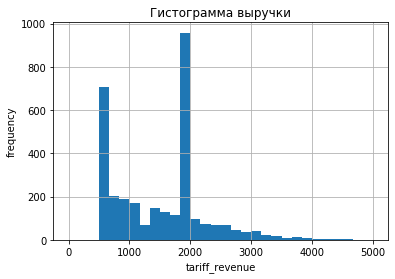

In [59]:
import matplotlib.pyplot as plt
df['tariff_revenue'].hist(bins=30, range = (0, 5000))
plt.title('Гистограмма выручки')
plt.ylabel("frequency")
plt.xlabel("tariff_revenue")
plt.show()

<div class="alert alert-info">
<h2>Комментарий студента, дубль 2</h2>
Можно ли из гистограммы (данных в ней) как-то оперативно высчитывать проценты/доли?)
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

Неправильно метод работает, например, для случая, когда расход по звонкам 0 минут, но за интернет 44 ГБ и допустим в смс пользователь уложился, метод вернёт абоненскую плату, а нужно бы абоненскую плату + перерасход за интернет. Кстати откуда взялся `mb` в твоей функции? `if mb !=0 and mb > mb_limit:` ты его нигде не определяешь.
    
    
Хочу ещё обратить твоё внимание на то, что у тебя есть пропуски после объединения (и это нормально). Пропуск т.е. `NaN` возвращает `False` для всех операций, кроме проверки на `isna()`, поэтому твой код выше неявно заменит пропуски на абоненскую плату, лучше заменить пропуски нулями и не париться
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>
Столько всего не учла... Поправила, но данные, судя по диаграмме, изменились незначительно, верно ли теперь? Или есть еще условие, которое упустила?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

Почти всё верно (по модулю того, что надо `gb_sum` вместо `gb_used`), можно заметить, что ты перебираешь варианты больше/меньше или равно для 3ёх переменных. Т.е. каждая переменная принимает два значения, всего их 3, поэтому всего разных комбинаций будет $2^3 = 8$, а у тебя их 7, т.е. одной не хватает, отсюда и пропуск, т.к. функция вернёт `None`, если не зайдёт ни в один из `if`
    
Можно упростить код как-нибудь так:
    
```
total_sum = 0
    
if minutes > min_lim:
    total_sum += (minutes - min_lim) * rub_per_minute
if ...
    
if ...
    
return total_sum + rub_monthly_fee
    
```
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 2</h2>
Знала, что можно компактнее написать, очень изящный вариант :) . У меня, к сожалению, не получилось записать его так, чтобы он отработал (закоментила). Но нашла условие, которое пропустила. И вроде как все заработало, тесты тоже. Но уверенности, что верно, нет). Очень сильно поменялась картина. Подскажи, пожалуйста, почему у меня мог не отработать твой вариант и верно ли дальше по выводам? 
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.3</h2>

Всё верно, у тебя вместо `min_limit` было написано `min_lim`
</div>

In [60]:
#Код ревьюера
# Поэтому у тебя p-value np.nan получается

df['tariff_revenue'].isna().sum()

0

Многие пользователи "укладываются" в тариф smart, однако существенная часть доплачивается за услуги. Клиентам тарифа ultra проще уложиться в пакеты, однако и у них есть дополнительные затраты.

### Поведение клиентов оператора

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Сгруппируем данные по тарифу и построим гистограммы**

In [61]:
df.groupby('tariff').count()

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,churn_date,city,...,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_revenue
tariff,,,,,,,,,,,,,,,,,,,,,
smart,2230,2229,2230,2230,2228,2230,2230,2230,112,2230,...,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230
ultra,986,985,986,986,975,986,986,986,77,986,...,986,986,986,986,986,986,986,986,986,986


In [62]:
df.groupby('tariff').mean().astype('int')

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_revenue
tariff,,,,,,,,,,,,,,,,
smart,1246,8,58,417,16215,16,33,46,50,15360,500,550,200,3,3,1289
ultra,1262,8,73,526,19668,19,49,46,1000,30720,3000,1950,150,1,1,2070


In [63]:
df.groupby('tariff').median().astype('int')

,user_id,month,call_count,call_sum,mb_sum,gb_used,messages_count,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_revenue
tariff,,,,,,,,,,,,,,,,
smart,1240,9,60,421,16507,17,28,47,50,15360,500,550,200,3,3,1021
ultra,1277,9,73,518,19394,19,38,45,1000,30720,3000,1950,150,1,1,1950


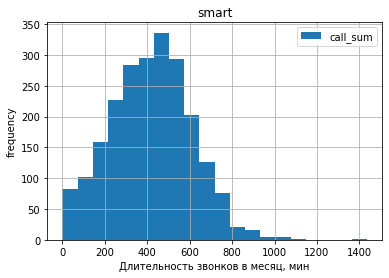

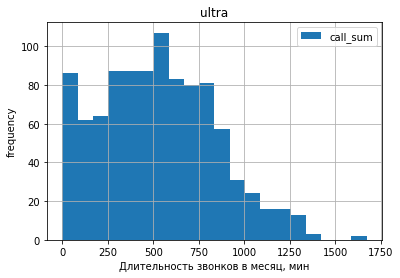

In [64]:
#построим гистограмму для длительности звонков
for tariff, data in df.groupby('tariff'):
    data.plot(y='call_sum', title=tariff, kind='hist', bins=20, grid=True)
    plt.ylabel("frequency")
    plt.xlabel("Длительность звонков в месяц, мин")

Для обоих тарифов распределение длительность звонков можно отнести к нормальным. Среднее и медиана отличаются незначительно. В обоих тарифах есть пользователи, которым не хватает пакетных минут. В тарифе smart таких пользователей больше. 

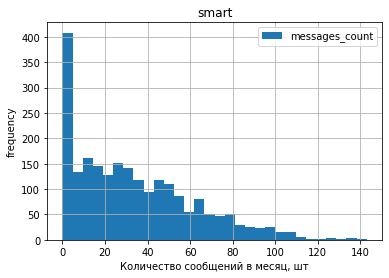

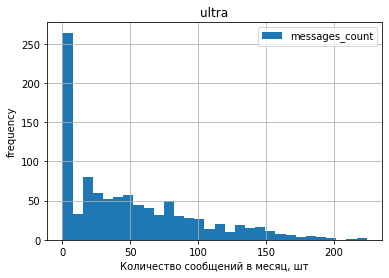

In [65]:
#построим гистограмму для сообщений
for tariff, data in df.groupby('tariff'):
    data.plot(y='messages_count', title=tariff, kind='hist', bins=30, grid=True)
    plt.ylabel("frequency")
    plt.xlabel("Количество сообщений в месяц, шт")

Для обоих тарифов распределение сообщений ассиметрично, имеет скошенность в положительную сторону. Многим пользователям в тарифе smart не хватает пакетных сообщений. Пользователям ultra далеко до лимита сообщений в месяц. 

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>
    
Если интересно, то это распределение Пуассона https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0
</div>

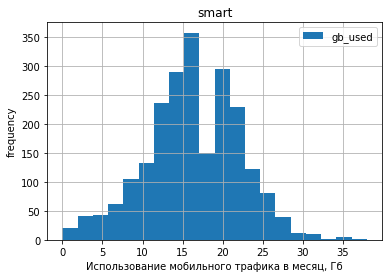

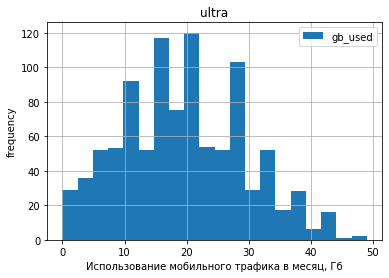

In [66]:
#построим гистограмму для трафика
for tariff, data in df.groupby('tariff'):
    data.plot(y='gb_used', title=tariff, kind='hist', bins=20, grid=True)
    plt.ylabel("frequency")
    plt.xlabel("Использование мобильного трафика в месяц, Гб")

Распределения использования трафика можно отнести к нормальным. Пользователям в обоих тарифах не хватает Гб: почти половине пользователей в тарифе smart, и небольшой части в тарифе ultra.

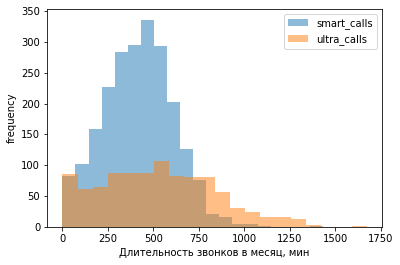

In [67]:
# df.loc[df['tariff']=='smart', 'call_sum'].plot(bins=20, kind='hist', alpha=0.5);
# df.loc[df['tariff']=='ultra', 'call_sum'].plot(bins=20, kind='hist', alpha=0.5);
smart_calls = df.loc[df['tariff']=='smart', 'call_sum']
ultra_calls = df.loc[df['tariff']=='ultra', 'call_sum']

smart_calls.plot(bins=20, kind='hist', alpha=0.5);
ultra_calls.plot(bins=20, kind='hist', alpha=0.5);

plt.ylabel("frequency")
plt.xlabel("Длительность звонков в месяц, мин")
plt.legend(('smart_calls', 'ultra_calls'))
plt.show()

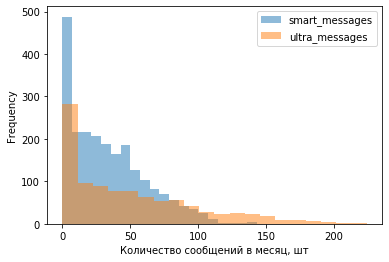

In [68]:
df.loc[df['tariff']=='smart', 'messages_count'].plot(bins=20, kind='hist', alpha=0.5);
df.loc[df['tariff']=='ultra', 'messages_count'].plot(bins=20, kind='hist', alpha=0.5);
plt.xlabel("Количество сообщений в месяц, шт")
plt.legend(('smart_messages', 'ultra_messages'))
plt.show()

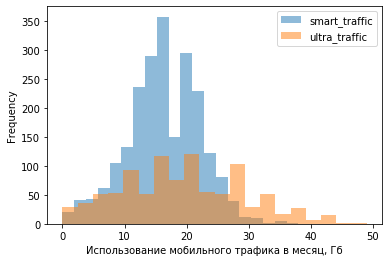

In [69]:
df.loc[df['tariff']=='smart', 'gb_used'].plot(bins=20, kind='hist', alpha=0.5);
df.loc[df['tariff']=='ultra', 'gb_used'].plot(bins=20, kind='hist', alpha=0.5);
plt.xlabel("Использование мобильного трафика в месяц, Гб")
plt.legend(('smart_traffic', 'ultra_traffic'))
plt.show()

Так как пользователей тарифа smart больше, у них большая площадь на сравнительных графиках.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Неплохо бы иметь названия и легенду для таких графиков :)
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>

Согласна). То добавила, что нужно?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

Ага :)
</div>

**Посчитаем дисперсию и стандартное отклонение**

In [70]:
#посчитаем общую дисперсию для длительности звонков

import numpy as np

calls = df['call_sum']
calls_variance = np.var(calls)
print(calls_variance)

58592.39952977263


In [71]:
#посчитаем дисперсию для длительности звонков в тарифе smart
calls_smart = df.loc[df['tariff']=='smart', 'call_sum']
#calls_smart.head()
calls_smart_variance = np.var(calls_smart, ddof=1)
print(calls_smart_variance)

36281.39383644458


In [72]:
#посчитаем дисперсию для длительности звонков в тарифе ultra
calls_ultra = df.loc[df['tariff']=='ultra', 'call_sum']
calls_ultra_variance = np.var(calls_ultra, ddof=1)
print(calls_ultra_variance)

101052.49354928387


**Сгруппируем данные и посчитаем дисперсию и стандартное отклонение по тарифам**

In [73]:
df[['call_sum', 'gb_used', 'messages_count', 'tariff']].groupby('tariff').var(ddof=1)

,call_sum,gb_used,messages_count
tariff,,,
smart,36281.393836,33.133453,796.955256
ultra,101052.493549,97.378544,2285.417425


In [74]:
df[['call_sum', 'gb_used', 'messages_count', 'tariff']].groupby('tariff').std(ddof=1)

,call_sum,gb_used,messages_count
tariff,,,
smart,190.476754,5.756167,28.230396
ultra,317.887549,9.868057,47.806040


Дисперсия в тарифах сильно отличается, у тарифа ultra она больше: почти в 3 раза по всем показателям. Стандартное отклонение у тарифа ultra также больше (что логично).

## Гипотезы

### Проверим различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» 

In [75]:
from scipy import stats as st

revenue_smart = df.loc[df['tariff'] == 'smart', 'tariff_revenue']
revenue_ultra = df.loc[df['tariff'] == 'ultra', 'tariff_revenue']

alpha = 0.05 #допустим, что в 5% случаев мы готовы ошибаться

#выдвинем гипотезу, что выручки равны

results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о том, что cредняя выручка от тарифов «Смарт» и «Ультра» не различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что cредняя выручка от тарифов «Смарт» и «Ультра» не различается")

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу о том, что cредняя выручка от тарифов «Смарт» и «Ультра» не различается


<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

Здесь уже надо аккуратнее:
    <li>у тебя неправильно сформулированы гипотезы: нулевая гипотеза всегда говорит о том, что статистически значимых различий нет, т.е. тут говорит о том, что средние равны </li>
        <li>Зачем `p-value` делить пополам? И почему гипотеза одностороняя? По умолчанию тест, который ты используешь `two-sided` </li>
        <li>Зачем проверять: `revenue_smart.mean() == revenue_ultra.mean()`?  Тесты для того и были придуманы, потому что простая проверка средних арифметических не статистически значимая</li>
        <li>Если интересно, вот материал про разницу тестов https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/ </li>
        <li>Для проверки равенства средних двух независимых  выборок есть тест `ttest_ind` (https://en.wikipedia.org/wiki/Student%27s_t-test тут можно все разновидности посмотреть). Разница между ними на самом деле не очень большая, но этот тест во-первых учитывает размер выборок, а во-вторых может учитывать дисперсии, которые как ты выше заметила скорее всего разные </li>    
    
    
В общем если коротко, то надо правильно сформулировать гипотезы и использовать `ttest_ind` с `equal_var=False`
</div>

<div class="alert alert-info">
<h2>Комментарий студента, дубль 1</h2>

Ох, эта тема пока не улеглась в голове, буду проходить еще раз. Спасибо за подробные комментарии и ссылку!) У меня почему-то получается NaN в обоих случаях, с чем это может быть связано? Подскажи, пожалуйста, где я ошибаюсь?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

Написал выше из-за чего так происходит. Советую тебе явно написать формулировку гипотез текстом и поправить их в `print'ах`, т.к. нулевая гипотеза о том, что например средние для выручек пользователей из Москвы и регионов равны, т.е. если она отклоняется, то выручки скорее всего не равны, а не наоборот
</div>

Несмотря на то, что стоимость тарифов отличается более, чем в 3 раза, средняя выручка от пользователей не отличается. Вероятно из-за того, что пользователей тарифа smart больше: 2 230 против 986.

<div class="alert alert-success">
<h2>Комментарий ревьюера V.3</h2>

> Отвергаем нулевую гипотезу о том, что cредняя выручка от тарифов «Смарт» и «Ультра» не различается

Ну раз так выводится, то очевидно, что выручка всё таки различается :)
</div>

### Проверим, отличается ли выручка от пользователей в Москве от выручки в других регионах

In [76]:
#выдвинем двустороннюю гипотезу, что выручки отличаются

revenue_msk = df.loc[df['city'] == 'Москва', 'tariff_revenue']
revenue_reg = df.loc[df['city'] != 'Москва', 'tariff_revenue']

alpha = 0.05

results = st.ttest_ind(revenue_msk, revenue_reg, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о том, что выручка от пользователей в Москве не отличается от выручки в других регионах")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что выручка от пользователей в Москве не отличается от выручки в других регионах")

p-значение:  0.5216952110000278
Не получилось отвергнуть нулевую гипотезу о том, что выручка от пользователей в Москве не отличается от выручки в других регионах


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Здесь аналогично как и выше. Тут кстати ты зачем-то используешь медиану вместо среднего, хотя тест предполагает среднее :) Вывод ниже скорректируется как всё поправишь
</div>

По нашим данным выручка от столичных пользователей не отличается от выручки в регионах, по крайней мере, нам не удалось отвергнуть гипотезу, что они равны. 

## Общие выводы

Какой тариф лучше? По показателям средней выручки тариф ultra приносит больший доход, хотя у него и меньше пользоватлей. У тарифа smart много пользователей, которые выходят за лимиты: по длительности звонков, количеству сообщений и трафику. В обоих тарифах есть пользователи, которым не хватает трафика мобильного интернета, но в тарифе ultra - это небольшая часть клиентов. 

Возможно, стоит ввести акционный тариф с большим количеством минут (наример, 800), сообщений (80-100) и Гб в пакете (20-20) и протестировать его популярность и доходность. Для пользователей тарифа ultra можно ввести пакет с дополнительным трафиком или повысить лимит ГБ и поднять абонентскую плату. 

<div class="alert alert-success">
<h2>Комментарий ревьюера V.3</h2>

👍
</div>